# Demo 8: Autoencoder (AE)

This demo introduces the **Autoencoder**, one of the fundamental models in Generative AI.<br>
An Autoencoder learns to **compress** data into a lower-dimensional latent space and then **reconstruct** it back to the original form.

We will apply it to the **MNIST handwritten digits dataset** to show how it learns data representations in an unsupervised way.

In [1]:
# Import Libraries
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Step 1: Load and Visualize Dataset

We use the MNIST dataset, which contains 60,000 handwritten digit images of size 28×28.

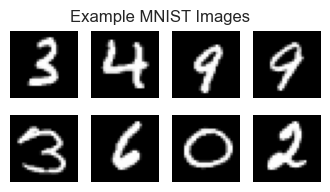

In [6]:
# Convert images to tensors
transform = transforms.Compose(
    [transforms.ToTensor()] # Converts image pixels from [0, 255] → [0, 1]
)
# Load MNIST dataset (handwritten digits 0–9)
# Each image: 28x28 grayscale, each label: integer digit (0–9)
# Set download=False because the dataset is already stored locally
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=transform
)
# Create DataLoader for batching and shuffling
# Batching makes training faster, and shuffling ensures better generalization
train_loader = DataLoader(
    train_data,
    batch_size=128,
    shuffle=True
)

# Show a few examples
images, labels = next(iter(train_loader))
plt.figure(figsize=(4, 2))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.axis('off')
plt.suptitle("Example MNIST Images")
plt.show()

## Step 2: Build Autoencoder Model

An Autoencoder consists of two parts:
- **Encoder:** compresses the input image into a smaller latent vector.
- **Decoder:** reconstructs the original image from that latent vector.

We'll use a simple fully connected network for both parts.

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # --- Encoder ---
        # The encoder compresses a 28x28 image (784 pixels) into a smaller latent vector.
        # It learns key features of the input data in a compact form.
        self.encoder = nn.Sequential(
            nn.Flatten(),                 # Convert 2D image (1, 28, 28) → 1D vector (784)
            nn.Linear(28 * 28, 128),      # Fully connected layer: 784 → 128 neurons
            nn.ReLU(),                    # Non-linear activation
            nn.Linear(128, 32)            # Further compress to 32-dimensional latent space
        )
        # --- Decoder ---
        # The decoder reconstructs the image from the latent vector.
        # It learns to map compressed representations back to the original input space.
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),           # Expand latent space back to 128 neurons
            nn.ReLU(),                    # Activation function
            nn.Linear(128, 28 * 28),      # Reconstruct the original 784-pixel image
            nn.Sigmoid(),                 # Ensure output pixel values are in [0, 1]
            nn.Unflatten(1, (1, 28, 28))  # Reshape 1D vector back to 2D image
        )

    def forward(self, x):
        """
        Forward pass through the Autoencoder.
        Args:
            x (Tensor): Input batch of images, shape (batch_size, 1, 28, 28)
        Returns:
            Tensor: Reconstructed images with same shape as input
        """
        z = self.encoder(x)
        return self.decoder(z)

## Step 3: Train the Autoencoder

We train the model to minimize **Mean Squared Error (MSE)** between input and reconstructed images.

In [8]:
# Initialize model, loss function, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train for 5 epochs (one pass over the dataset = 1 epoch)
for epoch in range(5):
    for x, _ in train_loader:
        x = x.to(device)
        recon = model(x)
        loss = criterion(recon, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}: loss = {loss.item():.4f}")

Epoch 1: loss = 0.0246
Epoch 2: loss = 0.0162
Epoch 3: loss = 0.0125
Epoch 4: loss = 0.0130
Epoch 5: loss = 0.0110


## Step 4: Visualize Reconstruction

We compare the **original images** and their **reconstructions** after training.

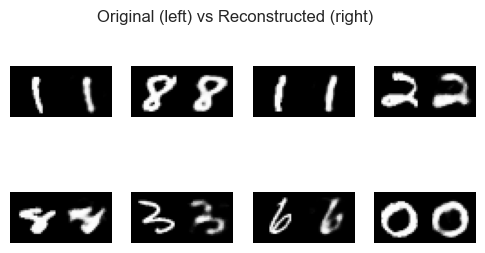

In [10]:
x, _ = next(iter(train_loader))
x = x.to(device)
with torch.no_grad():
    reconstructed = model(x)

plt.figure(figsize=(6, 3))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    # Show original (left) and reconstructed (right) side by side
    comparison = torch.cat([x[i], reconstructed[i]], dim=2)[0].cpu()
    plt.imshow(comparison, cmap='gray')
    plt.axis('off')
plt.suptitle("Original (left) vs Reconstructed (right)")
plt.show()

## Step 5: Discussion

- The Autoencoder successfully learns to **compress** and **reconstruct** the MNIST digits.
- Although the outputs are slightly blurry, they still capture the core shapes of the digits.
- This demonstrates how the network learns a **latent representation** of the data without any labels.
- Such a concept forms the foundation of **Generative AI**, and advanced models like **VAE** and **GAN** build upon this principle.

---

## Conclusion

In this demo, we implemented and trained an **Autoencoder** that reconstructs handwritten digits.
It shows how deep neural networks can learn to represent complex data in a compact latent space, which is a key step toward generative AI.
